# Some analysis of the bead lab data

First we need to import the modules that will help us get the numbers to the screen.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, binom

# The following line is only needed in jupyter notebook (i.e. here), not when doning this from command line.
%matplotlib inline

## Confidence interval



Normal(mu=0.00, sigma=1.00)
95.0% confidence is the range [-1.96, 1.96]
P(X > a)=0.975
P(X < b)=0.975
P(a < X < b)=0.950

Binom(n=100, p=0.33)
95.0% confidence is the range [24, 42]
P(X >= a)=0.984
P(X <= b)=0.972
P(a <= X <= b)=0.956


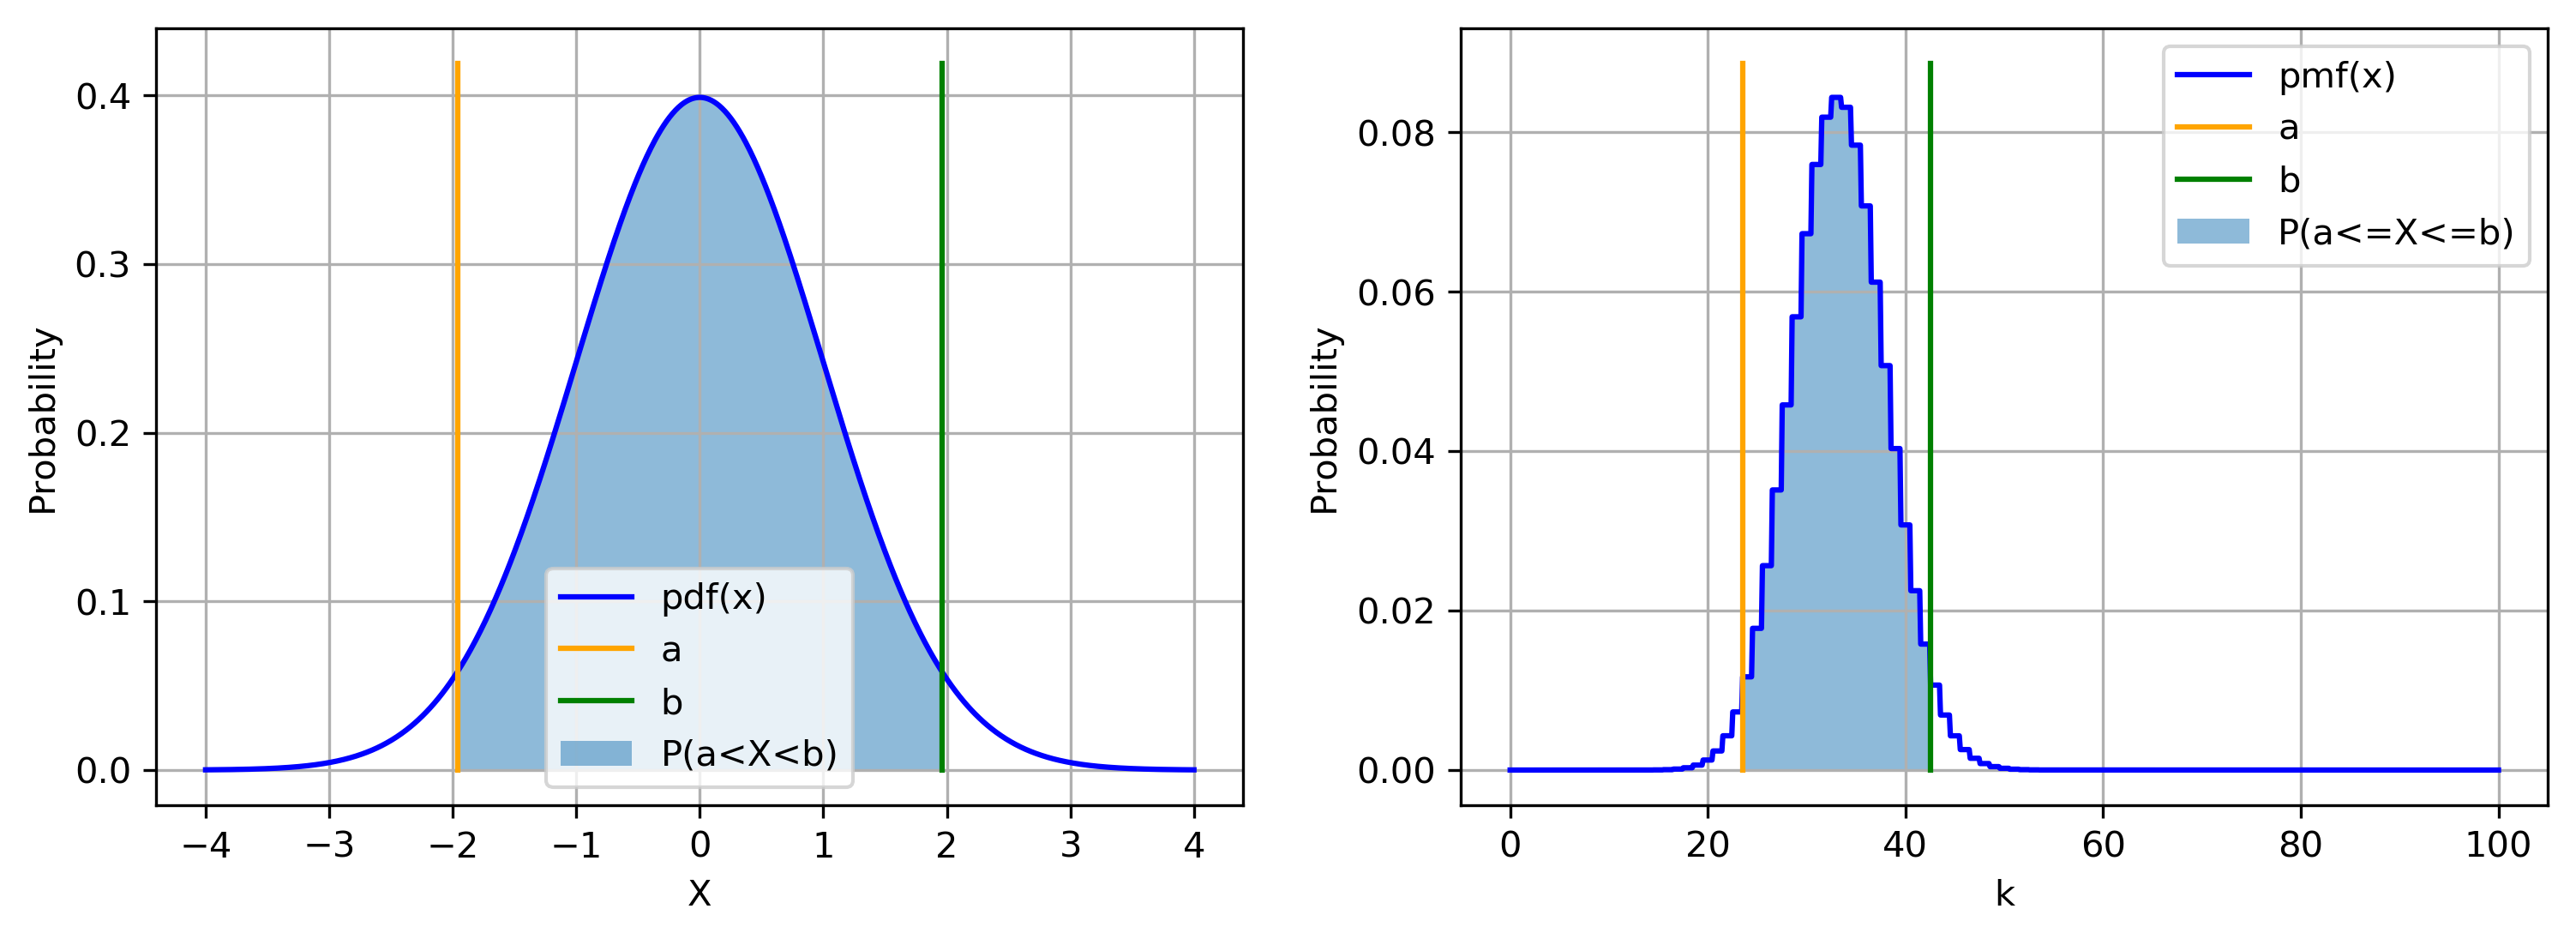

In [2]:
mu = 0
sigma = 1
n = 100
p = 1/3
confidence_interval = 0.95

assert 0 <= p and p <= 1, "p must be a probability"
assert n > 1

def bisection_search(func, x, low=0, high=1, max_iter=10):
    """Looks for the y such that x = f(y)"""
    #print(low, high)
    assert low < high
    assert func(low) < x
    assert x < func(high)
    if x == func(low):
        return low
    if x == func(high):
        return high
    middle = low + (high - low)/2
    if x == func(middle) or max_iter == 0:
        return middle
    elif x < func(middle):
        return bisection_search(func, x, low=low, high=middle, max_iter=max_iter-1)
    elif x > func(middle):
        return bisection_search(func, x, low=middle, high=high, max_iter=max_iter-1)

fig = plt.figure(figsize=(12, 4), dpi=300)
ax = fig.subplots(1, 2)

norm_distr = norm(mu, sigma)
a = bisection_search(norm_distr.cdf, (1-confidence_interval)/2, low=mu-6*sigma, high=mu+6*sigma, max_iter=20)
b = bisection_search(norm_distr.cdf, 1-(1-confidence_interval)/2, low=mu-6*sigma, high=mu+6*sigma, max_iter=20)

print("Normal(mu=%.2f, sigma=%.2f)" %(mu, sigma))
print("%.1f%% confidence is the range [%.2f, %.2f]" % (confidence_interval*100, a, b))
print("P(X > a)=%.3f" % (1 - norm_distr.cdf(a)))
print("P(X < b)=%.3f" % (norm_distr.cdf(b)))
print("P(a < X < b)=%.3f" % (norm_distr.cdf(b) - norm_distr.cdf(a)))

x = np.linspace(norm_distr.mean()-4*norm_distr.std(), norm_distr.mean()+4*norm_distr.std(), 1000)
y = norm_distr.pdf(x)

ax[0].plot(x, y, 'blue', label="pdf(x)")
if a >= np.min(x):
    ax[0].plot([a, a], [0, np.max(y)*1.05], 'orange', label="a")
if b <= np.max(x):
    ax[0].plot([b, b], [0, np.max(y)*1.05], 'green', label="b")
fillmask = a<=x
fillmask *= x<=b
ax[0].fill_between(x[fillmask], y[fillmask], alpha=.5, label="P(a<X<b)")
ax[0].legend()
ax[0].set_ylabel("Probability")
ax[0].set_xlabel("X")
ax[0].grid()

binom_distr = binom(n=n, p=p)
k = np.arange(n+1)
a = k[np.argmin(np.abs(np.cumsum(binom_distr.pmf(k))-(1-confidence_interval)/2))]
b = k[np.argmin(np.abs(np.cumsum(binom_distr.pmf(k))-(1-(1-confidence_interval)/2)))]
x = np.linspace(np.min(k), np.max(k), max(n, 1000))
y = binom_distr.pmf(np.round(x))

print()
print("Binom(n=%i, p=%.2f)" %(n, p))
print("%.1f%% confidence is the range [%i, %i]" % (confidence_interval*100, a, b))
print("P(X >= a)=%.3f" % np.sum([binom_distr.pmf(k) for k in range(a, n+1)]))
print("P(X <= b)=%.3f" % np.sum([binom_distr.pmf(k) for k in range(0, b+1)]))
print("P(a <= X <= b)=%.3f" % np.sum([binom_distr.pmf(k) for k in range(a, b+1)]))
#print("P-value")

ax[1].plot(x, y, 'b', label="pmf(x)")
if a >= np.min(x):
    ax[1].plot([a-.5, a-.5], [0, np.max(y)*1.05], 'orange', label="a")
if b <= np.max(x):
    ax[1].plot([b+.5, b+.5], [0, np.max(y)*1.05], 'green', label="b")
fillmask = (a-.5)<=x
fillmask *= x<=(b+.5)
ax[1].fill_between(x[fillmask], y[fillmask], alpha=.5, label="P(a<=X<=b)")
ax[1].legend()
ax[1].set_ylabel("Probability")
ax[1].set_xlabel("k")
ax[1].grid()

## Z-test calculator

Population distribution: X ~ N(25.0, 4.5^2)
Sample mean distribution: Xs ~ N(23.0, 1.0^2)
95% confidence interval for Xbar: [21.0, 25.0]
P(Xs>mu)=0.0234 <= alpha  (i.e. a significant result, given the confidence level)
Rejection region for 95% CL: [-inf, 23.3]
P(Xs<mu)=0.9766 > alpha
P(|Xbar-mu|<|Xs-mu|<)=0.0469 <= alpha  (i.e. a significant result, given the confidence level)


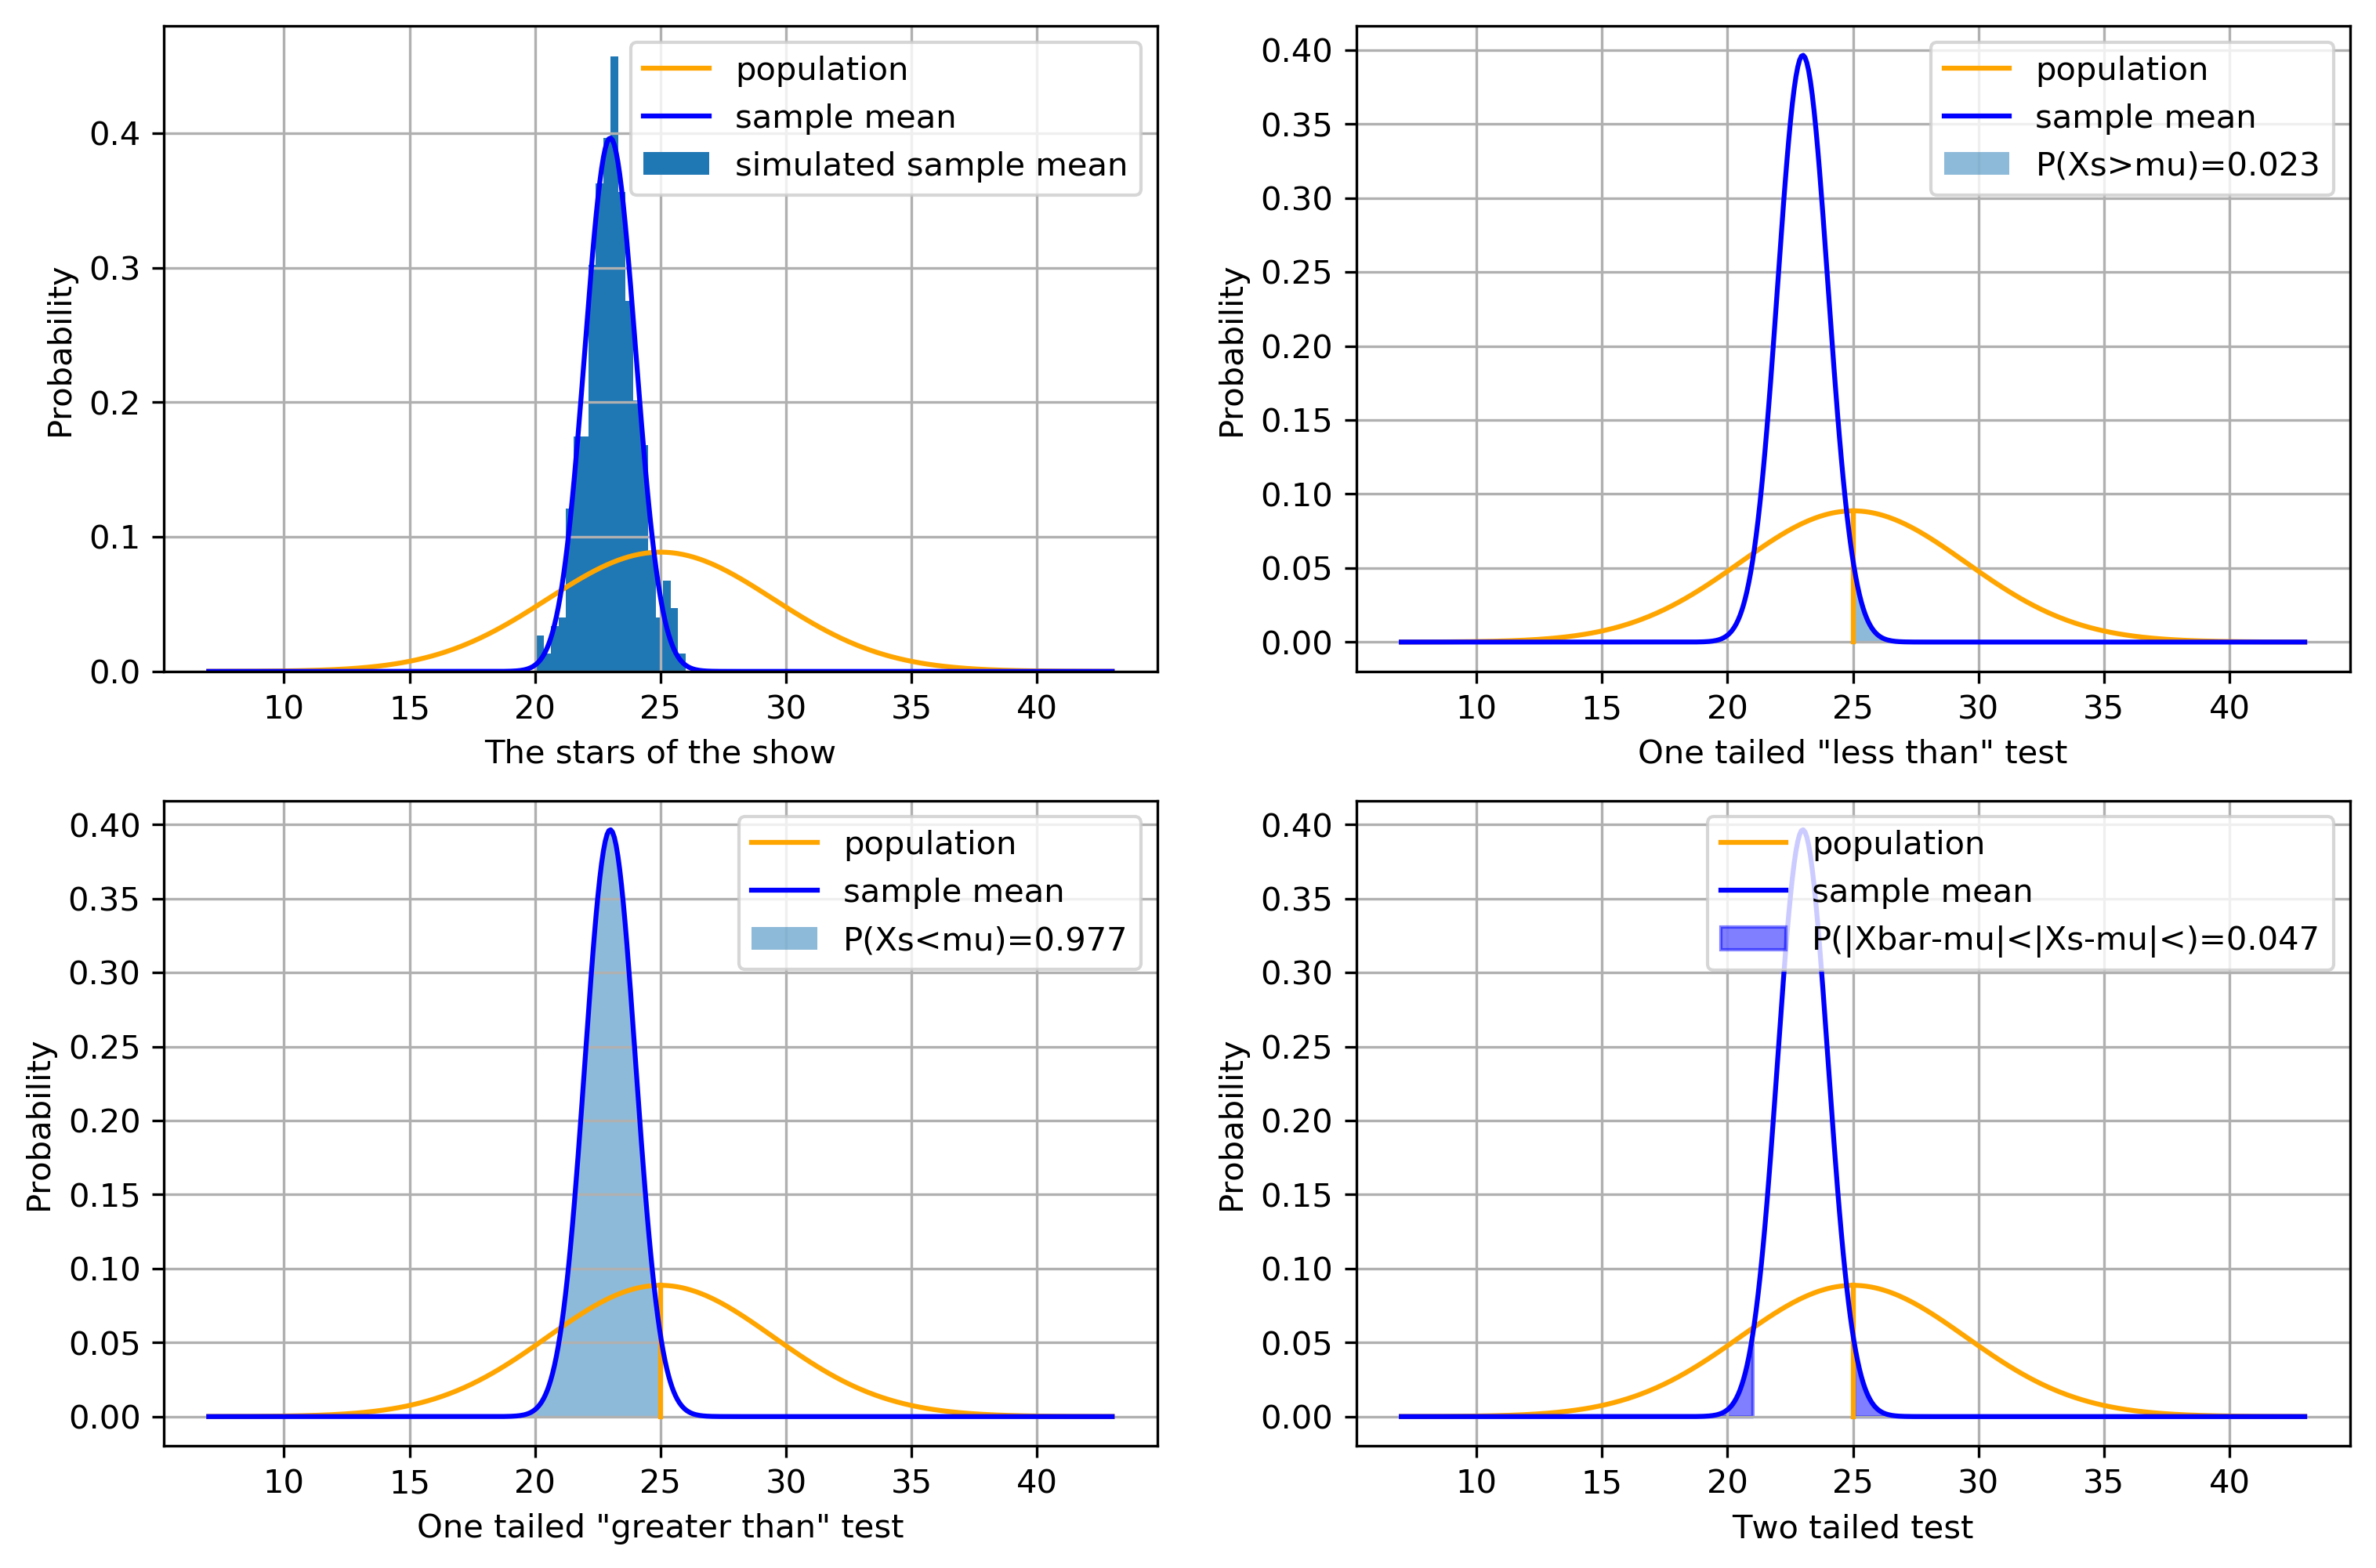

In [107]:
# 20181107 exam question
mu = 25 # Mean of larger population
sigma = 4.5 # SD of large population
n = 20 # Sample size
Xbar = 23 # Sample mean
confidence_level = 0.95

# Cold remedy
#mu = 7 # Mean of larger population
#sigma = 1.5 # SD of large population
#n = 100 # Sample size
#Xbar = 5.2 # Sample mean
#confidence_level = 0.99

# Weight reduction
mu = 0 # Mean of larger population
sigma = 4 # SD of large population
n = 36 # Sample size
Xbar = 1.5 # Sample mean
confidence_level = 0.95

alpha = 1 - confidence_level

# TODO Finish two-tailed z-test
# TODO Rejection regions
assert n > 0
n_simulated = 500

population = norm(mu, sigma)
sample_mean = norm(Xbar, sigma/np.sqrt(n))
print("Population distribution: X ~ N(%.1f, %.1f^2)" % (population.mean(), population.std()))
print("Sample mean distribution: Xs ~ N(%.1f, %.1f^2)" % (sample_mean.mean(), sample_mean.std()))
CI = sample_mean.interval(confidence_level)
print("%i%% confidence interval for Xbar: [%.1f, %.1f]" % (confidence_level*100, CI[0], CI[1]))

fig = plt.figure(figsize=(12, 8), dpi=300)
ax = fig.subplots(2, 2).ravel()
x = np.linspace(min(mu-4*sigma, Xbar-4*sigma/np.sqrt(n)), max(mu+4*sigma, Xbar+4*sigma/np.sqrt(n)), 500)
y1 = population.pdf(x)
y2 = sample_mean.pdf(x)

ax[0].plot(x, y1, 'orange', label="population")
ax[0].plot(x, y2, 'blue', label="sample mean")
sim_samples = np.mean(np.random.normal(loc=Xbar, scale=sigma, size=(n_simulated, n)), axis=1)
ax[0].hist(sim_samples, 20, density=True, label="simulated sample mean")
ax[0].legend(loc="upper right")
ax[0].set_ylabel("Probability")
ax[0].set_xlabel("The stars of the show")
ax[0].grid()

p_value_less = 1-sample_mean.cdf(mu)
print("P(Xs>mu)=%.4f" % p_value_less, end="")
if p_value_less <= alpha:
    print(" <= alpha  (i.e. a significant result, given the confidence level)")
else:
    print(" > alpha")
RR = (-np.inf, norm(mu, sigma/np.sqrt(n)).ppf(alpha))
print("Rejection region for %i%% CL: [%.1f, %.1f]" % (confidence_level*100, RR[0], RR[1]))

ax[1].plot(x, y1, 'orange', label="population")
ax[1].plot(population.mean()*np.ones(2), [0, np.max(y1)], 'orange')
ax[1].plot(x, y2, 'blue', label="sample mean")
fillmask = mu<=x
ax[1].fill_between(x[fillmask], y2[fillmask], alpha=.5, label="P(Xs>mu)=%.3f" % p_value_less)
ax[1].legend(loc="upper right")
ax[1].set_ylabel("Probability")
ax[1].set_xlabel("One tailed \"less than\" test")
ax[1].grid()

p_value_greater = sample_mean.cdf(mu)
print("P(Xs<mu)=%.4f" % p_value_greater, end="")
if p_value_greater <= alpha:
    print(" <= alpha  (i.e. a significant result, given the confidence level)")
else:
    print(" > alpha")

ax[2].plot(x, y1, 'orange', label="population")
ax[2].plot(population.mean()*np.ones(2), [0, np.max(y1)], 'orange')
ax[2].plot(x, y2, 'blue', label="sample mean")
fillmask = mu>=x
ax[2].fill_between(x[fillmask], y2[fillmask], alpha=.5, label="P(Xs<mu)=%.3f" % p_value_greater)
ax[2].legend(loc="upper right")
ax[2].set_ylabel("Probability")
ax[2].set_xlabel("One tailed \"greater than\" test")
ax[2].grid()

d = np.abs(Xbar-mu)
p_value_twotailed = 1-(sample_mean.cdf(Xbar+d) - sample_mean.cdf(Xbar-d))
print("P(|Xbar-mu|<|Xs-mu|<)=%.4f" % p_value_twotailed, end="")
if p_value_twotailed <= alpha:
    print(" <= alpha  (i.e. a significant result, given the confidence level)")
else:
    print(" > alpha")

ax[3].plot(x, y1, 'orange', label="population")
ax[3].plot(population.mean()*np.ones(2), [0, np.max(y1)], 'orange')
ax[3].plot(x, y2, 'blue', label="sample mean")
fillmask = (Xbar-d)>=x
ax[3].fill_between(x[fillmask], y2[fillmask], color='blue', alpha=.5,
                   label="P(|Xbar-mu|<|Xs-mu|<)=%.3f" % p_value_twotailed)
fillmask = (Xbar+d)<=x
ax[3].fill_between(x[fillmask], y2[fillmask], color='blue', alpha=.5)
ax[3].legend(loc="upper right")
ax[3].set_ylabel("Probability")
ax[3].set_xlabel("Two tailed test")
ax[3].grid()



In [113]:
RR = (norm(mu, sigma/np.sqrt(n)).ppf(1-alpha), np.inf)
print("Rejection region for %i%% CL: [%.1f, %.1f]" % (confidence_level*100, RR[0], RR[1]))

RR = (norm(mu, sigma/np.sqrt(n)).ppf(alpha/2), norm(mu, sigma/np.sqrt(n)).ppf(1-alpha/2))
print("Rejection region for %i%% CL: [%.1f, %.1f] U [%.1f, %.1f]" % (confidence_level*100, -np.inf, RR[0], RR[1], np.inf))


Rejection region for 95% CL: [26.7, inf]
Rejection region for 95% CL: [-inf, 23.0] U [27.0, inf]


## Load the bead lab data
The bead lab data can be imported from csv. Python has a csv module but it is not used here as an example on how to read in data "manually". The number of samples of each study can be calculated as a sum of the different categories ($n(total) = \sum_{colours} n(colour)$).

In [3]:
with open("bead_lab.csv", 'r') as f:
    colours = f.readline()
    colours = [e.strip() for e in colours.split(",")]
    data = dict()
    for c in colours:
        data[c] = list()
    for line in f.readlines():
        for c, n in zip(colours, line.split(",")):
            data[c].append(int(n.strip()))
data["N"] = np.zeros(len(data[colours[0]]), dtype=np.int)
for c in colours:
    data[c] = np.asarray(data[c], dtype=np.int)
    data["N"] += data[c]
for k in data.keys():
    print(k, "\t", data[k])


White 	 [  5  90   2 125  73  16 158  99  57 109 261  22  57  54 159 157  58   6
 149  20  60 135]
Red 	 [ 8 43  1 56 32 10 85 43 24 44 57  9 37 37 58 54 40  6 87 10 33 66]
Blue 	 [ 2  9  1 20  8  0 18 13  6 10 20  6  5  6 17 26 10  0 18  5 15 18]
Green 	 [ 3 27  5 26 22  3 44 25 13 24 32  7 23 16 26 41 27  1 34  4  4 33]
Yellow 	 [ 2  8  1 13  6  3 12  8  6  3 10  4  7 10  8 15  9  1 17  2  2 13]
N 	 [ 20 177  10 240 141  32 317 188 106 190 380  48 129 123 268 293 144  14
 305  41 114 265]


Estimated distributions from valuing each study equally, even the "my friends say"-study.

We could also value the different studies in proportion to its sample size. Let's say that each study only reported percentages and sample size of their data.

In [4]:
print("\t| Un-weighted\t| Unbiased\t| Weighted")
print("Colour\t| Mean\tStd\t| Mean\tStd")
mu = dict()
std = dict()
mu_w = dict()
std_w = dict()
mu_unbiased = dict()
std_unbiased = dict()
weights = data["N"]/np.sum(data["N"])
for c in colours:
    mu[c] = np.mean(data[c]/data["N"])
    std[c] = np.std(data[c]/data["N"])
    mu_unbiased[c] = mu[c]
    std_unbiased[c] = np.std(data[c]/data["N"], ddof=1)    
    mu_w[c] = np.sum((data[c]/data["N"])*weights)
    std_w[c] = np.sqrt(np.sum(weights*((data[c]/data["N"]-mu[c])**2)))
    print("%s\t| %.3f\t%.3f\t| %.3f\t%.3f\t| %.3f\t%.3f" %
          (c, mu[c], std[c], mu_unbiased[c], std_unbiased[c], mu_w[c], std_w[c]))

print("\nweights:", ", ".join(["%.3f" % w for w in weights]))

	| Un-weighted	| Unbiased	| Weighted
Colour	| Mean	Std	| Mean	Std
White	| 0.483	0.101	| 0.483	0.103	| 0.528	0.086
Red	| 0.253	0.071	| 0.253	0.072	| 0.237	0.050
Blue	| 0.068	0.033	| 0.068	0.034	| 0.066	0.021
Green	| 0.140	0.086	| 0.140	0.088	| 0.124	0.040
Yellow	| 0.055	0.024	| 0.055	0.024	| 0.045	0.020

weights: 0.006, 0.050, 0.003, 0.068, 0.040, 0.009, 0.089, 0.053, 0.030, 0.054, 0.107, 0.014, 0.036, 0.035, 0.076, 0.083, 0.041, 0.004, 0.086, 0.012, 0.032, 0.075


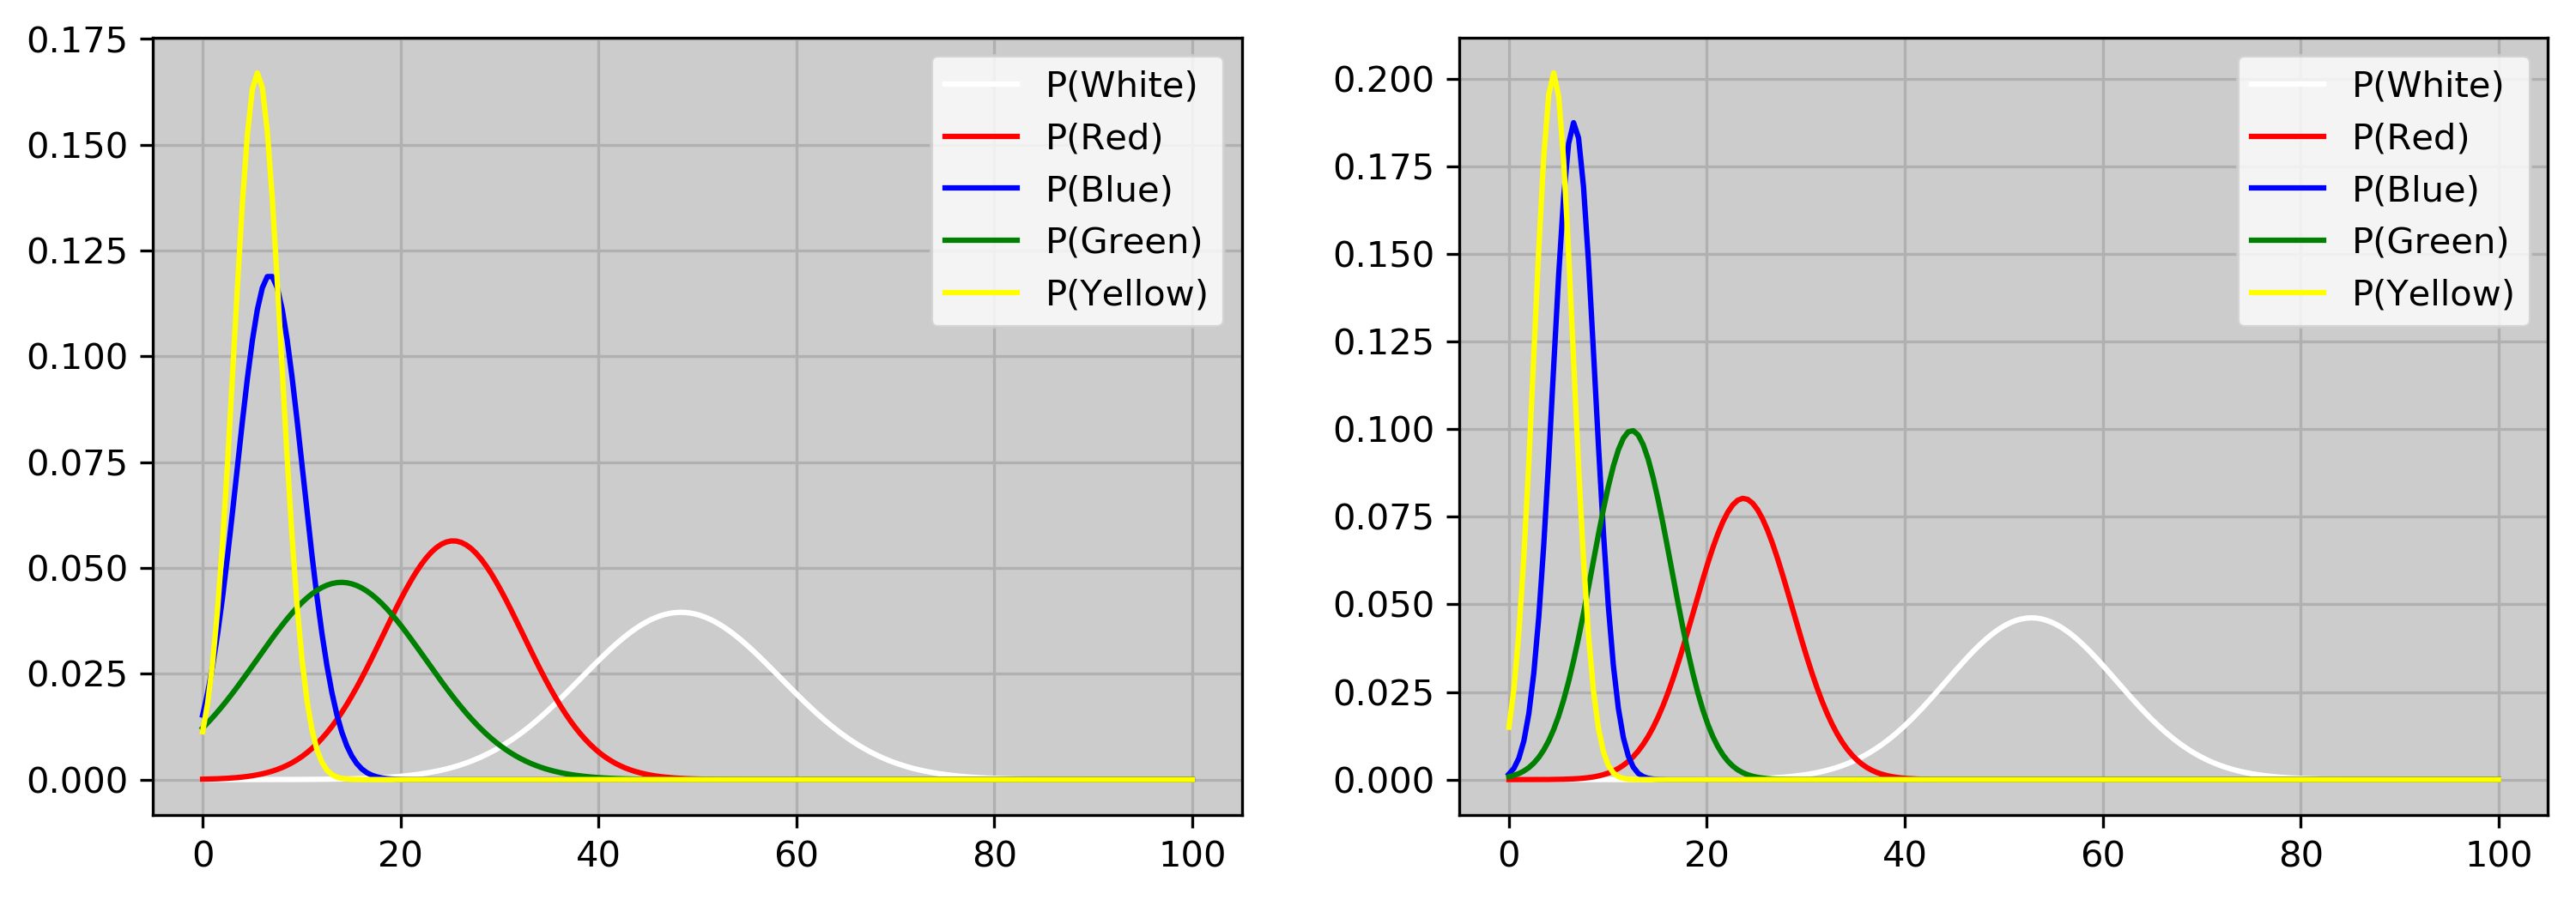

In [5]:
fig = plt.figure(figsize=(12, 4), dpi=300)
ax = fig.subplots(1, 2)

x = np.linspace(0, 100, 200)

for c in colours:
    y = norm(100*mu[c], 100*std[c]).pdf(x)
    ax[0].plot(x, y, c=c, label="P("+c+")")
ax[0].legend()
ax[0].set_facecolor((0.8, 0.8, 0.8))
ax[0].grid()

for c in colours:
    y = norm(100*mu_w[c], 100*std_w[c]).pdf(x)
    ax[1].plot(x, y, c=c, label="P("+c+")")
ax[1].legend()
ax[1].set_facecolor((0.8, 0.8, 0.8))
ax[1].grid()

A better way, not always possible in a meta study, is to use all the data as one investigation. The sampling
for each category separately is now modelled as Bernouli trials using a binomial distribution This modelling is an 
approximation. We should be using a multinomial but thats not a part of the course.

In [6]:
N = np.sum(data["N"])
k = np.arange(N)

print("Colour\tProbability")
p = dict()
for c in colours:
    p[c] = np.sum(data[c])/N
    print("%s\t%.3f" % (c, p[c]))

print("N: %i" % N)

Colour	Probability
White	0.528
Red	0.237
Blue	0.066
Green	0.124
Yellow	0.045
N: 3545


The parameters $n$ and $p$ for the binomial distribution for each study can be easily
estimated by summing and relative frequency. Let's plot some of them together to see
how different the distribution can look depending on their respeective parameters.

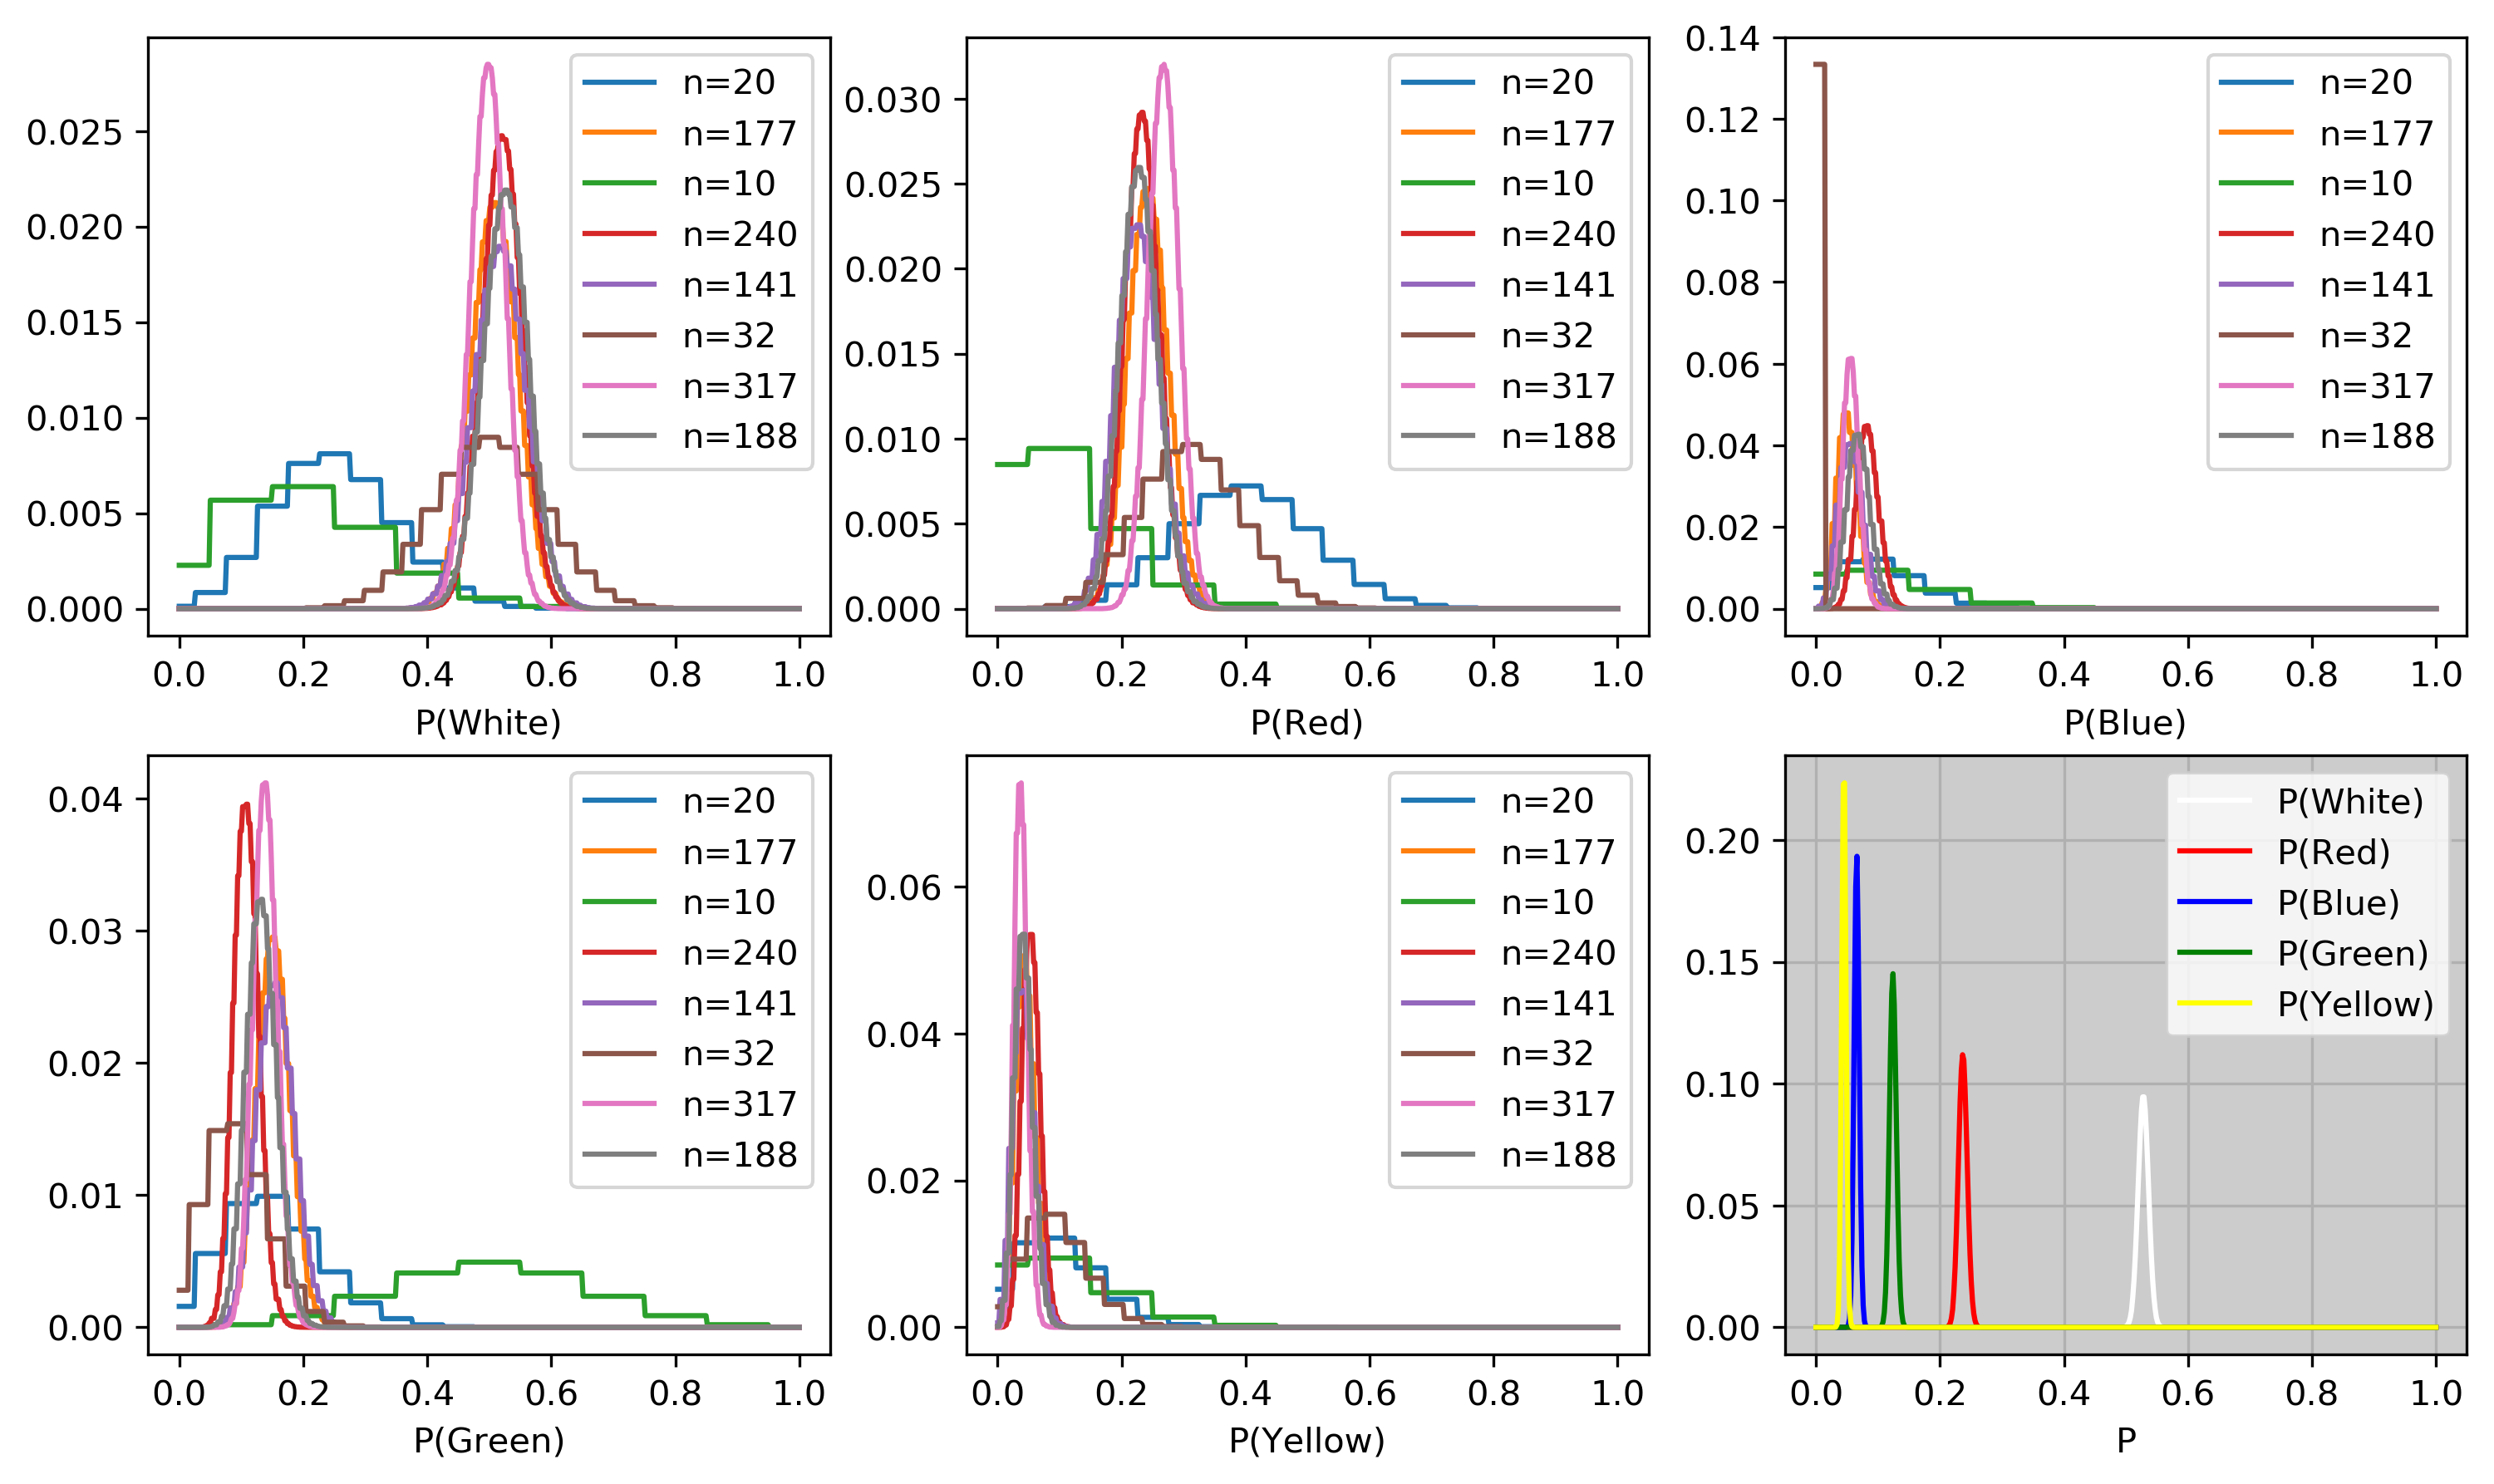

In [7]:
fig = plt.figure(figsize=(12, 7), dpi=300)
ax = fig.subplots(2, 3).ravel()

x = np.linspace(0, 1, 500)
for i, c in enumerate(colours):
    for study in range(8):
        n = data["N"][study]
        k = np.round(x*n)
        p = data[c][study]/n
        y = binom(n=n, p=p).pmf(k)
        #y /= np.max(y)
        y /= np.trapz(y)
        ax[i].plot(x, y, label="n=%i" % n)
        ax[i].set_xlabel("P("+c+")")
        ax[i].legend()
        ax[i].grid()

n = np.sum(data["N"])
k = np.round(x*n)
for c in colours:
    p = np.sum(data[c])/n
    y = binom(n=n, p=p).pmf(k)
    y /= np.trapz(y)
    ax[5].plot(x, y, color=c, label="P(%s)" % c)
ax[5].set_xlabel("P")
ax[5].set_facecolor((0.8, 0.8, 0.8))
ax[5].legend()
ax[5].grid()

The variance of a binomian distribution is definded as $np(1-p)$. We can use this to show 
the relation between the standard deviation and $n$ of the different studies. Below, the 
analytical variance of the different studies from the lab are shown (left) and a simulation 
of the std compared to the analytical one for $p=.5$ (right).


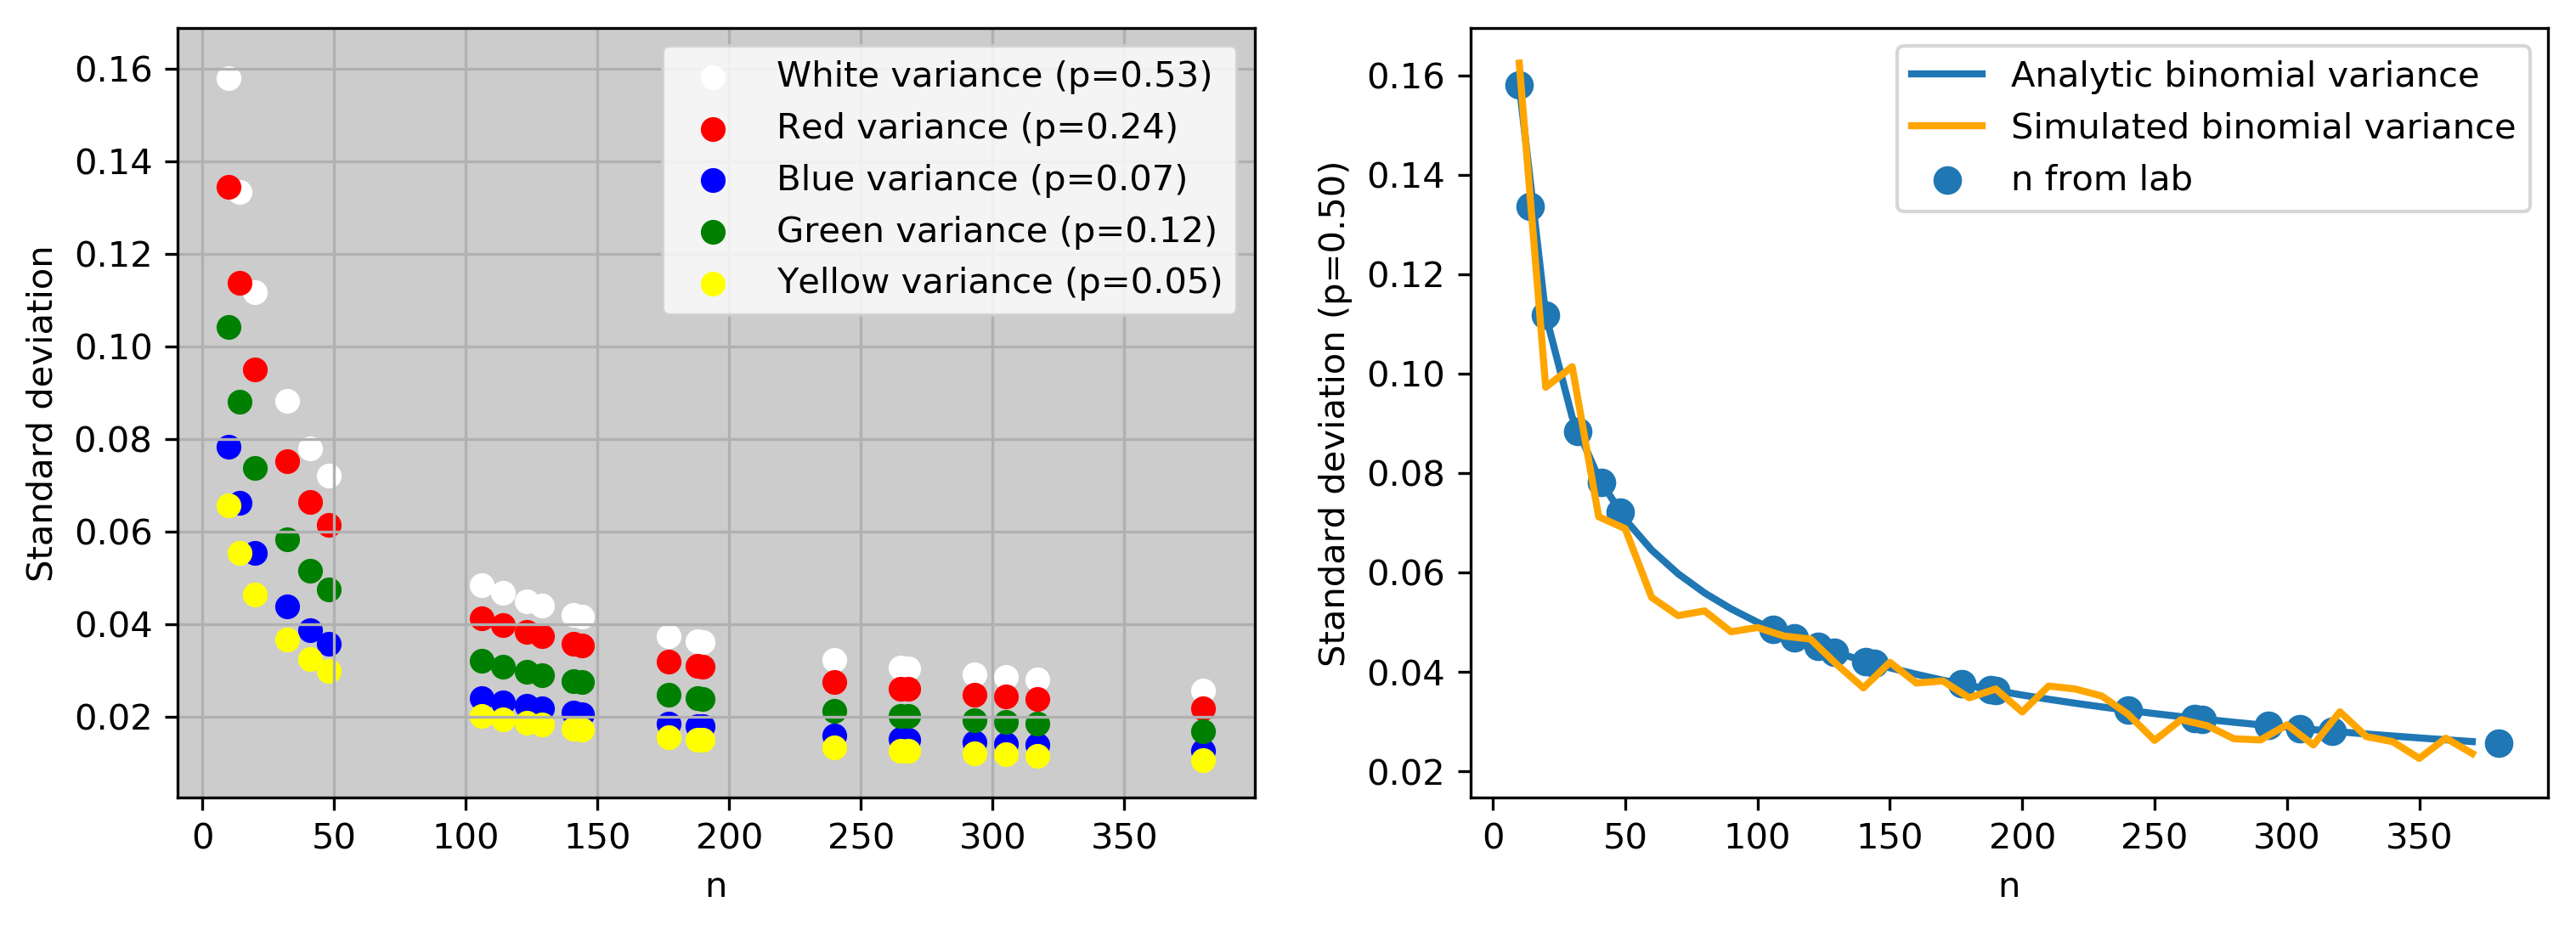

In [8]:
n_simulations = 100
p_simulations = .5

fig = plt.figure(figsize=(12, 4), dpi=300)
ax = fig.subplots(1, 2)

for c in colours:
    p = np.sum(data[c])/np.sum(data["N"])
    ax[0].scatter(data["N"], np.sqrt(data["N"]*p*(1-p))/data["N"],
                  color=c, marker='o', label="%s variance (p=%.2f)" % (c, p))
ax[0].legend()
ax[0].set_facecolor((0.8, 0.8, 0.8))
ax[0].set_xlabel("n")
ax[0].set_ylabel("Standard deviation")
ax[0].grid()

population = np.zeros(16000)
population[:int(len(population)*p_simulations)] = 1
N = np.arange(np.min(data["N"]), np.max(data["N"]), 10)
var_analytical = np.zeros(N.shape)
var_simulated = np.zeros(N.shape)
for i, n in enumerate(N):
    var_analytical[i] = np.sqrt(n*p_simulations*(1-p_simulations))/n
    v = np.zeros(n_simulations)
    for j in range(n_simulations):
        v[j] = np.sum(np.random.choice(population, size=n, replace=False))/n
    var_simulated[i] = np.std(v)

ax[1].scatter(data["N"], np.sqrt(data["N"]*p_simulations*(1-p_simulations))/data["N"], s=50, label="n from lab")
ax[1].plot(N, var_analytical, linewidth=2, label="Analytic binomial variance")
ax[1].plot(N, var_simulated, 'orange', linewidth=2, label="Simulated binomial variance")
ax[1].set_xlabel("n")
ax[1].set_ylabel("Standard deviation (p=%.2f)" % p_simulations)
ax[1].legend();


Let's calculate the confidence intervals for the different studies.

In [9]:
confidence = dict()

print("N\t", end="")
for c in colours:
    confidence[c] = list()
    print("%s\t\t" % c, end="")
print()
for study in range(len(data["N"])):
    n = data["N"][study]
    print("%i\t" % n, end="")
    for c in colours:
        p = data[c][study]/n
        d = binom(n=n, p=p)
        conf = tuple([max(0, (d.mean()-1.96*d.std())/n), min((d.mean()+1.96*d.std())/n, 1)])
        confidence[c].append(conf)
        print("%.2f, %.2f\t" % conf, end="")
    print()

for c in colours:
    v = np.vstack(confidence[c])
    conf = (np.max(v[:, 0]), np.min(v[:, 1]))
    print("95%% interval for %s is [%.3f, %.3f]" % (c, conf[0], conf[1]), end="")
    if conf[0] <= conf[1]:
        print()
    else:
        print(", which is imposible")

N	White		Red		Blue		Green		Yellow		
20	0.06, 0.44	0.19, 0.61	0.00, 0.23	0.00, 0.31	0.00, 0.23	
177	0.43, 0.58	0.18, 0.31	0.02, 0.08	0.10, 0.21	0.01, 0.08	
10	0.00, 0.45	0.00, 0.29	0.00, 0.29	0.19, 0.81	0.00, 0.29	
240	0.46, 0.58	0.18, 0.29	0.05, 0.12	0.07, 0.15	0.03, 0.08	
141	0.44, 0.60	0.16, 0.30	0.02, 0.09	0.10, 0.22	0.01, 0.08	
32	0.33, 0.67	0.15, 0.47	0.00, 0.00	0.00, 0.19	0.00, 0.19	
317	0.44, 0.55	0.22, 0.32	0.03, 0.08	0.10, 0.18	0.02, 0.06	
188	0.46, 0.60	0.17, 0.29	0.03, 0.11	0.08, 0.18	0.01, 0.07	
106	0.44, 0.63	0.15, 0.31	0.01, 0.10	0.06, 0.19	0.01, 0.10	
190	0.50, 0.64	0.17, 0.29	0.02, 0.08	0.08, 0.17	0.00, 0.03	
380	0.64, 0.73	0.11, 0.19	0.03, 0.08	0.06, 0.11	0.01, 0.04	
48	0.32, 0.60	0.08, 0.30	0.03, 0.22	0.05, 0.25	0.01, 0.16	
129	0.36, 0.53	0.21, 0.36	0.01, 0.07	0.11, 0.24	0.02, 0.09	
123	0.35, 0.53	0.22, 0.38	0.01, 0.09	0.07, 0.19	0.03, 0.13	
268	0.53, 0.65	0.17, 0.27	0.03, 0.09	0.06, 0.13	0.01, 0.05	
293	0.48, 0.59	0.14, 0.23	0.06, 0.12	0.10, 0.18	0.03, 0.08	
144	0.32

For which studies and colours were the best estimate of $p$ in the confidence interval?

In [12]:
N = np.sum(data["N"])
print("N\t", end="")
for c in colours:
    p = np.sum(data[c])/N
    print("%s (p=%.2f)\t" % (c, p), end="")
print()

for study in range(len(data["N"])):
    n = data["N"][study]
    conf_ok = True
    for c in colours:
        p = np.sum(data[c])/N
        conf = confidence[c][study]
        if p < conf[0] or conf[1] < p:
            conf_ok = False
    print("%i\t" % n, end="")
    for c in colours:
        p = np.sum(data[c])/N
        conf = confidence[c][study]
        if conf[0] <= p and p <= conf[1]:
            print("%.2f, %.2f\t" % conf, end="")
        else:
            print("\t\t", end="")
    if conf_ok:
        print("all OK", end="")
    print()

N	White (p=0.53)	Red (p=0.24)	Blue (p=0.07)	Green (p=0.12)	Yellow (p=0.05)	
20			0.19, 0.61	0.00, 0.23	0.00, 0.31	0.00, 0.23	
177	0.43, 0.58	0.18, 0.31	0.02, 0.08	0.10, 0.21	0.01, 0.08	all OK
10			0.00, 0.29	0.00, 0.29			0.00, 0.29	
240	0.46, 0.58	0.18, 0.29	0.05, 0.12	0.07, 0.15	0.03, 0.08	all OK
141	0.44, 0.60	0.16, 0.30	0.02, 0.09	0.10, 0.22	0.01, 0.08	all OK
32	0.33, 0.67	0.15, 0.47			0.00, 0.19	0.00, 0.19	
317	0.44, 0.55	0.22, 0.32	0.03, 0.08	0.10, 0.18	0.02, 0.06	all OK
188	0.46, 0.60	0.17, 0.29	0.03, 0.11	0.08, 0.18	0.01, 0.07	all OK
106	0.44, 0.63	0.15, 0.31	0.01, 0.10	0.06, 0.19	0.01, 0.10	all OK
190	0.50, 0.64	0.17, 0.29	0.02, 0.08	0.08, 0.17			
380					0.03, 0.08					
48	0.32, 0.60	0.08, 0.30	0.03, 0.22	0.05, 0.25	0.01, 0.16	all OK
129			0.21, 0.36	0.01, 0.07	0.11, 0.24	0.02, 0.09	
123			0.22, 0.38	0.01, 0.09	0.07, 0.19	0.03, 0.13	
268			0.17, 0.27	0.03, 0.09	0.06, 0.13	0.01, 0.05	
293	0.48, 0.59			0.06, 0.12	0.10, 0.18	0.03, 0.08	
144			0.20, 0.35	0.03, 0.11	0.12, 0.25	0.02

In [34]:
N = np.sum(data["N"])
n_studies = len(data["N"])
barX = dict()
for c in colours:
    barX[c] = [0, 0]
    for study in range(n_studies):
        n = data["N"][study]
        B = binom(n=n, p=data[c][study]/n)
        w = n/N
        w = 1/n_studies
        barX[c][0] += w*(B.mean()/n)
        barX[c][1] += (w*(B.std()/n))**2
        #print("%s\t%i\t%.3f\t%.3f" % (c, n, B.mean()/n, B.std()/n))
    barX[c][1] = np.sqrt(barX[c][1])
print(barX)

{'White': [0.4832766092307423, 0.013155533959690394], 'Red': [0.25320266311699907, 0.011974666302750831], 'Blue': [0.06787919680139363, 0.007013180710497219], 'Green': [0.14019721533195506, 0.010489130429465823], 'Yellow': [0.055444315518910006, 0.007542200848460298]}


White	48.3	1.3
Red	25.3	1.2
Blue	6.8	0.7
Green	14.0	1.0
Yellow	5.5	0.8


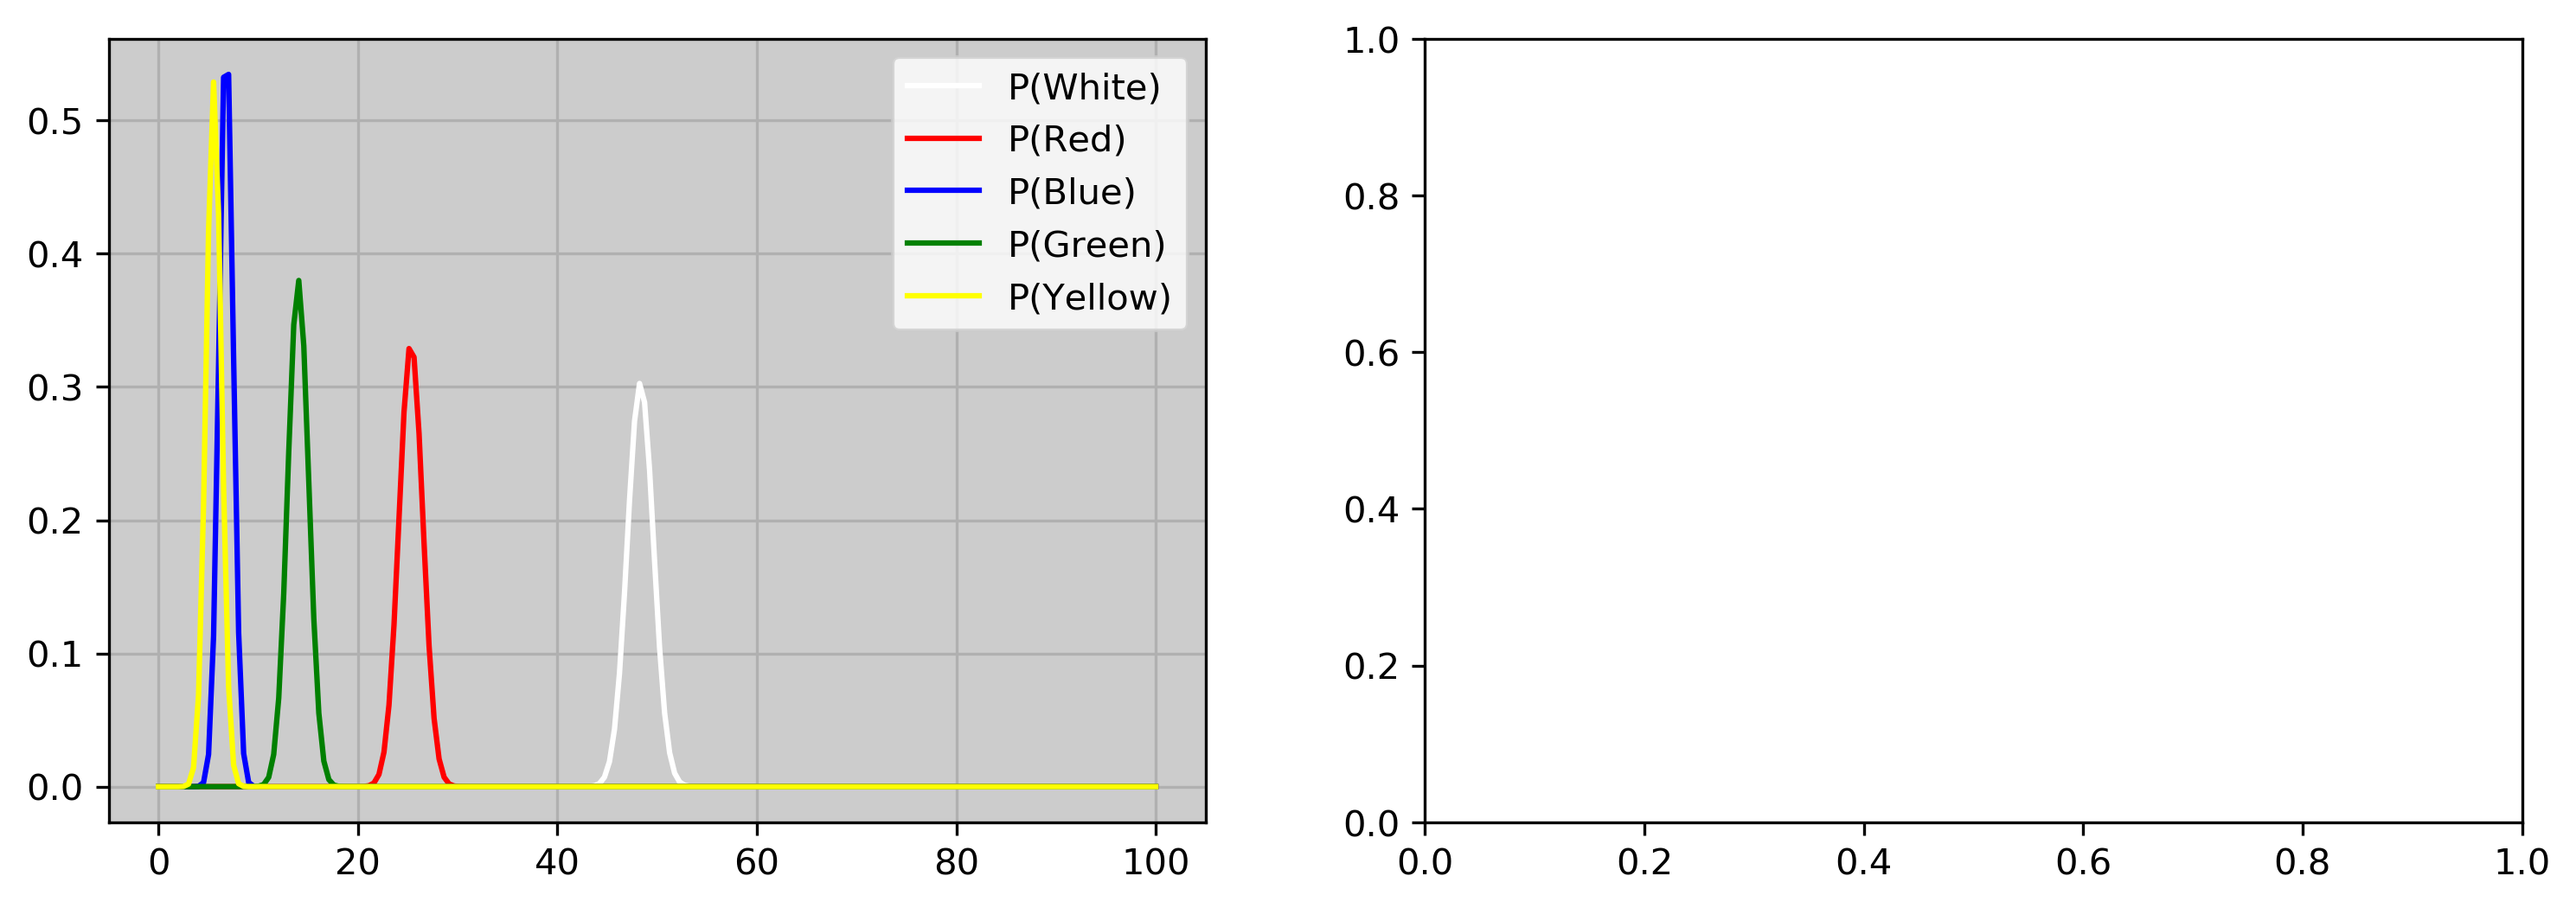

In [35]:
fig = plt.figure(figsize=(12, 4), dpi=300)
ax = fig.subplots(1, 2)

x = np.linspace(0, 100, 200)

for c in colours:
    mu = barX[c][0]*100
    sigma = barX[c][1]*100
    print("%s\t%.1f\t%.1f" % (c, mu, sigma))
    y = norm(mu, sigma).pdf(x)
    ax[0].plot(x, y, c=c, label="P("+c+")")
ax[0].legend()
ax[0].set_facecolor((0.8, 0.8, 0.8))
ax[0].grid()

